In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.3058581574

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [12]:
# Slope 
lm1.coef_

# Intercept
lm1.intercept_

array([-7963.33890628])

In [14]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

In [16]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48165.920323045124)

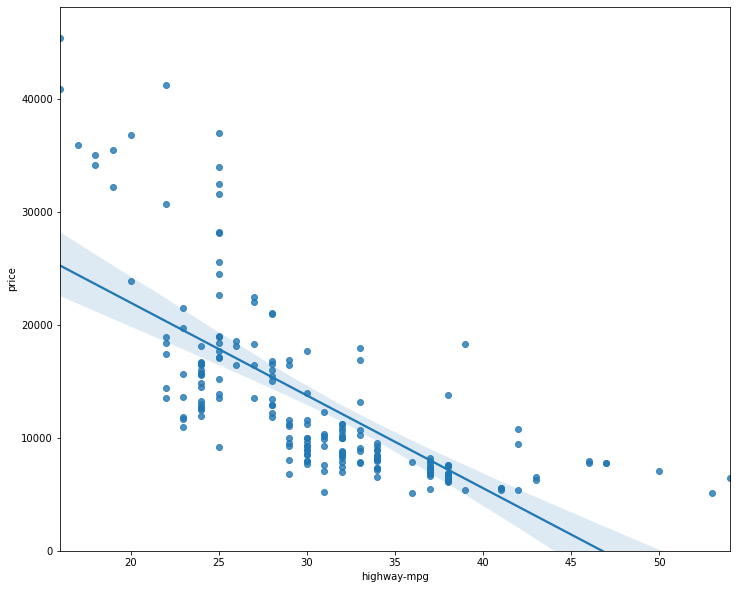

In [23]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

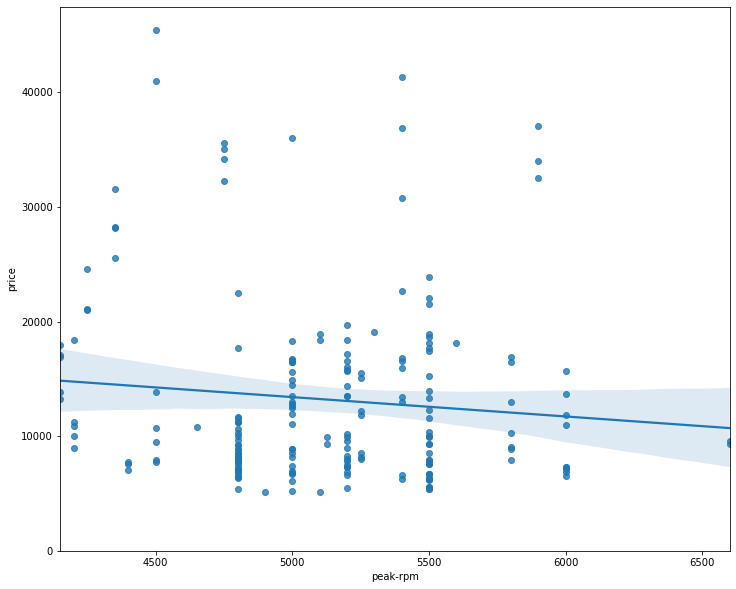

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [25]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


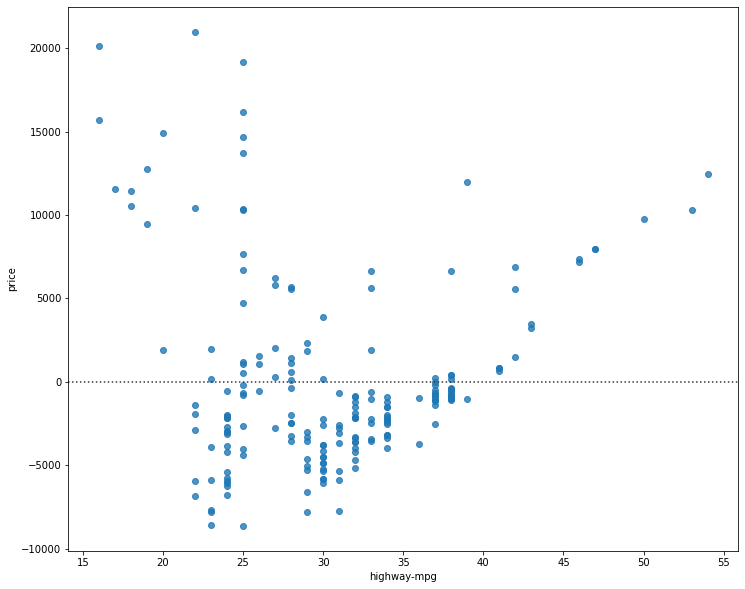

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [27]:
Y_hat = lm.predict(Z)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


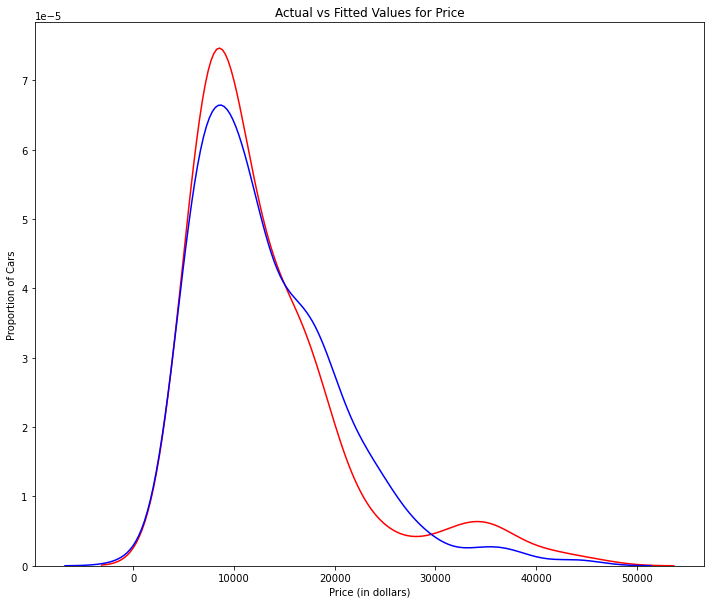

In [28]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [30]:
x = df['highway-mpg']
y = df['price']

In [31]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


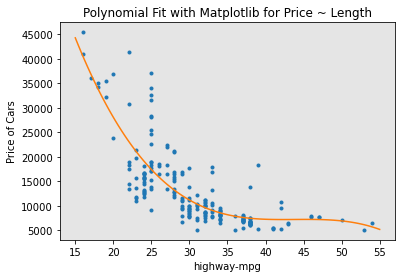

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


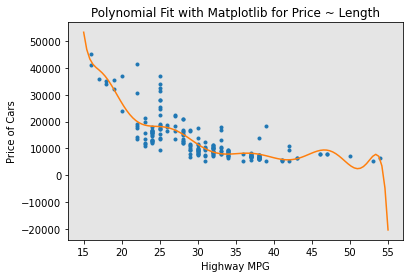

In [34]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [37]:
Z_pr=pr.fit_transform(Z)

In [38]:
Z.shape

(201, 4)

In [39]:
Z_pr.shape

(201, 15)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [42]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [45]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [46]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [49]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [50]:
Y_predict_multifit = lm.predict(Z)

In [51]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [52]:
from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


In [54]:
mean_squared_error(df['price'], p(x))

20474146.426361226

In [55]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

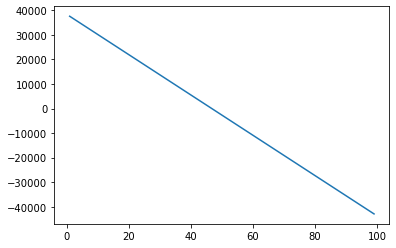

In [56]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

lm.fit(X, Y)
lm


yhat=lm.predict(new_input)
yhat[0:5]

plt.plot(new_input, yhat)
plt.show()

In [57]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [58]:
df.to_csv('module_5_auto.csv')



In [59]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [60]:
%%capture
! pip install ipywidgets

In [61]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [62]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [63]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [64]:
y_data = df['price']

x_data=df.drop('price',axis=1)


from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [65]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lre=LinearRegression()

In [68]:
lre.fit(x_train[['horsepower']], y_train)

lre.score(x_test[['horsepower']], y_test)

lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [72]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [77]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [74]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [75]:
from sklearn.model_selection import cross_val_predict

In [76]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [78]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [79]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [80]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


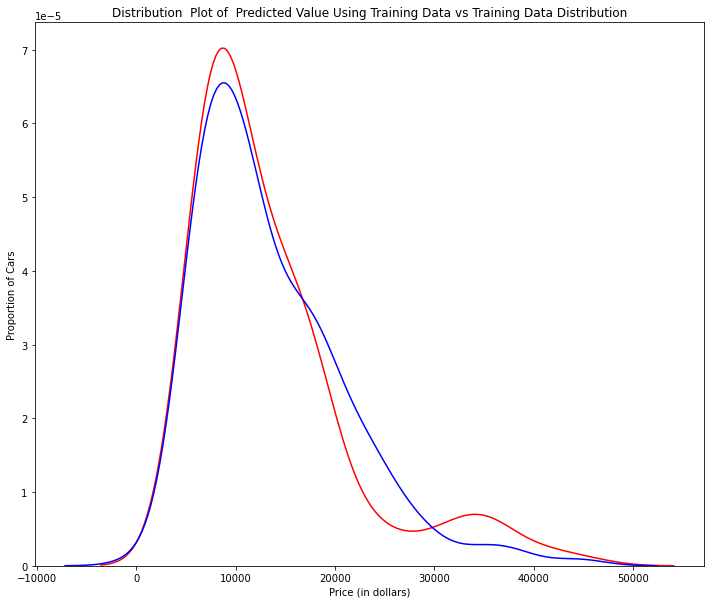

In [82]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


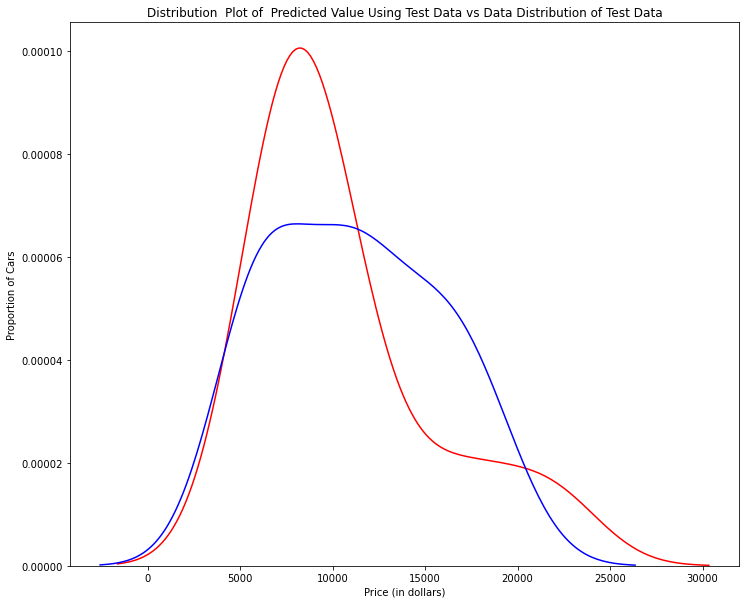

In [83]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [86]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [87]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [88]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.66261514,  7307.99517888, 12213.79574619, 18893.23100425,
       19995.9316467 ])

In [89]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.66261514  7307.99517888 12213.79574619 18893.23100425]
True values: [ 6295. 10698. 13860. 13499.]


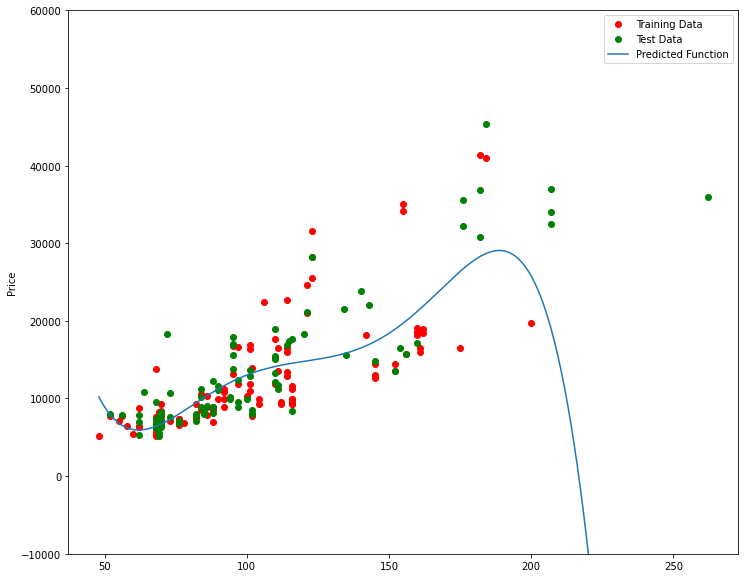

In [90]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [91]:
poly.score(x_train_pr, y_train)

0.5567716902317994

In [92]:
poly.score(x_test_pr, y_test)

-29.871374052452566

Text(3, 0.75, 'Maximum R^2 ')

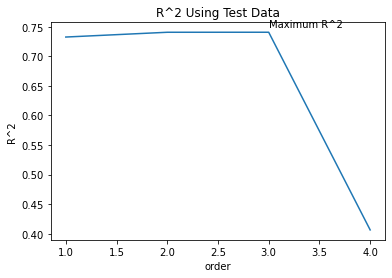

In [93]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [94]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAukAAAJCCAYAAAB9H1kmAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAABu2ElEQVR4nO3deXiU1d3/8c/JQiAsAcJOmIQdUfaICsgiKBalrlR0rLjUKFqrPo+2tmmrPv2lrbWtSy3YVC2oo6LWvW4VZFEQDIIsorJlQgBZAoQlQLbz+2MmmISZMEkmmTvJ+3VdXMmcue97zoQhfObMOd9jrLUCAAAA4BxRke4AAAAAgIoI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOExEQ7oxpq0x5lVjzNfGmA3GmHOMMe2NMf81xmz0f21X7vhfGmM2GWO+McZMLtc+whiz1n/f48YY42+PM8bM87cvN8akROBpAgAAANUS6ZH0xyS9b60dIGmIpA2S7pM031rbV9J8/20ZYwZKmi7pdEkXSppljIn2X2e2pDRJff1/LvS33yRpv7W2j6RHJD1UH08KAAAAqI2IhXRjTBtJYyU9LUnW2kJr7QFJl0ia6z9srqRL/d9fIukla+1xa+1WSZskjTTGdJXUxlq7zPp2Znq20jll13pV0sSyUXYAAADAqWIi+Ni9JO2R9C9jzBBJKyXdKamztXanJFlrdxpjOvmP7y7ps3Ln5/rbivzfV24vO2eb/1rFxph8SYmS9pbviDEmTb6ReLVs2XLEgAEDwvUcAQAAgIBWrly511rbMdB9kQzpMZKGS7rDWrvcGPOY/FNbggg0Am6raK/qnIoN1mZKypSk1NRUm5WVVVW/AQAAgFozxniD3RfJOem5knKttcv9t1+VL7Tv8k9hkf/r7nLH9yh3fpKkHf72pADtFc4xxsRISpC0L+zPBAAAAAijiIV0a+13krYZY/r7myZK+krSW5Jm+NtmSHrT//1bkqb7K7b0lG+B6Ar/1JhDxpiz/fPNr6t0Ttm1rpS0wD9vHQAAAHCsSE53kaQ7JHmMMc0kbZF0g3xvHF42xtwkKUfSNEmy1q43xrwsX5AvlnS7tbbEf52ZkuZIaiHpPf8fybco9TljzCb5RtCn18eTAgAAAGrDMLBcEXPSAQBAuBUVFSk3N1fHjh2LdFcQAc2bN1dSUpJiY2MrtBtjVlprUwOdE+mRdAAAgEYvNzdXrVu3VkpKiqgG3bRYa5WXl6fc3Fz17Nkz5PMivZkRAABAo3fs2DElJiYS0JsgY4wSExOr/SkKIR0AAKAeENCbrpr83RPSAQAAAIchpAMAADRyeXl5Gjp0qIYOHaouXbqoe/fuJ24XFhZWeW5WVpZ+9rOfnfIxRo0aFZa+Lly4UAkJCRo2bJj69++vsWPH6p133gnpvKVLl4alD07AwlEAAACn8Xik9HQpJ0dyuaSMDMntrvHlEhMTtXr1aknSAw88oFatWumee+45cX9xcbFiYgLHwtTUVKWmBixAUkE4A/K55557IpivXr1al156qVq0aKGJEycGPWfhwoVq1apV2N4sRBoj6QAAAE7i8UhpaZLXK1nr+5qW5msPo+uvv17/8z//owkTJugXv/iFVqxYoVGjRmnYsGEaNWqUvvnmG0m+8HvxxRdL8gX8G2+8UePHj1evXr30+OOPn7heq1atThw/fvx4XXnllRowYIDcbrfKSn6/++67GjBggMaMGaOf/exnJ65blaFDh+q3v/2tnnjiCUnS22+/rbPOOkvDhg3TpEmTtGvXLmVnZ+vJJ5/UI488oqFDh2rJkiUBj2tIGEkHAABwkvR0qaCgYltBga+9FqPpgXz77bf66KOPFB0drYMHD2rx4sWKiYnRRx99pF/96lf697//fdI5X3/9tT7++GMdOnRI/fv318yZM0+q/71q1SqtX79e3bp10+jRo/Xpp58qNTVVt9xyixYvXqyePXvq6quvDrmfw4cP18MPPyxJGjNmjD777DMZY/TUU0/pT3/6k/7yl7/o1ltvrfAJwf79+wMe11AQ0gEAAJwkJ6d67bUwbdo0RUdHS5Ly8/M1Y8YMbdy4UcYYFRUVBTznoosuUlxcnOLi4tSpUyft2rVLSUlJFY4ZOXLkibahQ4cqOztbrVq1Uq9evU7UCr/66quVmZkZUj/Lb76Zm5urq666Sjt37lRhYWHQ2uOhHudUTHcBAABwEpereu210LJlyxPf/+Y3v9GECRO0bt06vf3220HresfFxZ34Pjo6WsXFxSEdU5td7letWqXTTjtNknTHHXfopz/9qdauXat//OMfQfsZ6nFORUgHAABwkowMKT6+Ylt8vK+9DuXn56t79+6SpDlz5oT9+gMGDNCWLVuUnZ0tSZo3b15I561Zs0a/+93vdPvtt5/Uz7lz5544rnXr1jp06NCJ28GOaygI6QAAAE7idkuZmVJysmSM72tmZtjno1f285//XL/85S81evRolZSUhP36LVq00KxZs3ThhRdqzJgx6ty5sxISEgIeu2TJkhMlGG+//XY9/vjjJyq7PPDAA5o2bZrOPfdcdejQ4cQ5U6dO1euvv35i4Wiw4xoKU5uPHhqj1NRUm5WVFeluAACARmTDhg0npms0ZYcPH1arVq1krdXtt9+uvn376u677450t+pFoNeAMWaltTZgfUtG0gEAAFAv/vnPf2ro0KE6/fTTlZ+fr1tuuSXSXXIsqrsAAACgXtx9991NZuS8thhJBwAAAByGkA4AAAA4DCEdAAAAcBhCOgAAAOAwhHQAAIBGLi8vT0OHDtXQoUPVpUsXde/e/cTtwsLCU56/cOFCLV26NOB9c+bMUceOHTVs2DD17dtXkydPDnpseW+88Ya++uqraj+XpoKQDgAA4DCetR6lPJqiqAejlPJoijxrPbW6XmJiolavXq3Vq1fr1ltv1d13333idrNmzU55flUhXZKuuuoqrVq1Shs3btR9992nyy+/XBs2bKjymoT0qhHSAQAAHMSz1qO0t9PkzffKysqb71Xa22m1DuqVrVy5UuPGjdOIESM0efJk7dy5U5L0+OOPa+DAgRo8eLCmT5+u7OxsPfnkk3rkkUdO7OZZlQkTJigtLU2ZmZmSfLXRzzzzTA0ZMkRXXHGFCgoKtHTpUr311lu69957NXToUG3evDngcU0ZIR0AAMBB0uenq6CoYkAtKCpQ+vz0sD2GtVZ33HGHXn31Va1cuVI33nij0tN91//jH/+oVatWac2aNXryySeVkpJSYfT93HPPPeX1hw8frq+//lqSdPnll+vzzz/Xl19+qdNOO01PP/20Ro0apR/+8Id6+OGHtXr1avXu3TvgcU0ZmxkBAAA4SE5+TrXaa+L48eNat26dzj//fElSSUmJunbtKkkaPHiw3G63Lr30Ul166aU1ur619sT369at069//WsdOHBAhw8f1uTJkwOeE+pxTQUhHQAAwEFcCS55870B28PFWqvTTz9dy5YtO+m+//znP1q8eLHeeust/e53v9P69eurff1Vq1bptNNOkyRdf/31euONNzRkyBDNmTNHCxcuDHhOqMc1FUx3AQAAcJCMiRmKj42v0BYfG6+MiRlhe4y4uDjt2bPnREgvKirS+vXrVVpaqm3btmnChAn605/+dGJUu3Xr1jp06FBI1160aJEyMzN18803S5IOHTqkrl27qqioSB7P9/PqK18z2HFNFSEdAADAQdyD3MqcmqnkhGQZGSUnJCtzaqbcg9xhe4yoqCi9+uqr+sUvfqEhQ4Zo6NChWrp0qUpKSnTttddq0KBBGjZsmO6++261bdtWU6dO1euvvx504ei8efM0dOhQ9evXT7///e/173//+8RI+u9+9zudddZZOv/88zVgwIAT50yfPl0PP/ywhg0bps2bNwc9rqky5ecMQUpNTbVZWVmR7gYAAGhENmzYcCK0omkK9Bowxqy01qYGOp6RdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAKAJiI6O1tChQ3XGGWdo2rRpKigoqPG1rr/+er366quSpJ/85Cf66quvgh67cOFCLV26tNqPkZKSor179wZsHzRokIYOHXqivnu4VO7rk08+qWeffTZs16+OmIg8KgAAAOpVixYttHr1akmS2+3Wk08+qf/5n/85cX9JSYmio6Orfd2nnnqqyvsXLlyoVq1aadSoUdW+djAff/yxOnToELbrlanc11tvvTXsjxEqRtIBAACamHPPPVebNm3SwoULNWHCBF1zzTUaNGiQSkpKdO+99+rMM8/U4MGD9Y9//EOSZK3VT3/6Uw0cOFAXXXSRdu/efeJa48ePV9lGkO+//76GDx+uIUOGaOLEicrOztaTTz6pRx555MRupXv27NEVV1yhM888U2eeeaY+/fRTSVJeXp4uuOACDRs2TLfccouqs+Fm+T7s3btXKSkpkqQ5c+bo8ssv14UXXqi+ffvq5z//+YlzQunrAw88oD//+c+SpNWrV+vss8/W4MGDddlll2n//v0nHvsXv/iFRo4cqX79+gXckbUmGEkHAACoRw++vV5f7TgY1msO7NZG9089PaRji4uL9d577+nCCy+UJK1YsULr1q1Tz549lZmZqYSEBH3++ec6fvy4Ro8erQsuuECrVq3SN998o7Vr12rXrl0aOHCgbrzxxgrX3bNnj26++WYtXrxYPXv21L59+9S+fXvdeuutatWqle655x5J0jXXXKO7775bY8aMUU5OjiZPnqwNGzbowQcf1JgxY/Tb3/5W//nPf5SZmRn0OUyYMEHR0dGKi4vT8uXLq3y+q1ev1qpVqxQXF6f+/fvrjjvuUPPmzUPq6/z5809c57rrrtPf/vY3jRs3Tr/97W/14IMP6tFHHz3xM12xYoXeffddPfjgg/roo49C+ruoCiEdAACgCTh69KiGDh0qyTeSftNNN2np0qUaOXKkevbsKUn68MMPtWbNmhPzzfPz87Vx40YtXrxYV199taKjo9WtWzedd955J13/s88+09ixY09cq3379gH78dFHH1WYw37w4EEdOnRIixcv1muvvSZJuuiii9SuXbugz6U6010mTpyohIQESdLAgQPl9Xq1f//+kPpaJj8/XwcOHNC4ceMkSTNmzNC0adNO3H/55ZdLkkaMGKHs7OyQ+nUqhHQAAIB6FOqId7iVn5NeXsuWLU98b63V3/72N02ePLnCMe+++66MMVVe31p7ymMkqbS0VMuWLVOLFi1Oui+U8wOJiYlRaWmpJOnYsWMV7ouLizvxfXR0tIqLi0Pua6jKHqPs+uHAnHQAAABIkiZPnqzZs2erqKhIkvTtt9/qyJEjGjt2rF566SWVlJRo586d+vjjj08695xzztGiRYu0detWSdK+ffskSa1bt9ahQ4dOHHfBBRfoiSeeOHG77I3D2LFj5fF4JEnvvffeiTnfoUhJSdHKlSsl6cSnAFUJta9lEhIS1K5duxPzzZ977rkTo+p1hZAOAAAASb5yigMHDtTw4cN1xhln6JZbblFxcbEuu+wy9e3bV4MGDdLMmTMDBtSOHTsqMzNTl19+uYYMGaKrrrpKkjR16lS9/vrrJxZjPv7448rKytLgwYM1cOBAPfnkk5Kk+++/X4sXL9bw4cP14YcfyuVyhdzve+65R7Nnz9aoUaMClm2saV/Lmzt3ru69914NHjxYq1ev1m9/+9uQ+1cTpjorZ5uC1NRUW7Y6GAAAIBw2bNig0047LdLdQAQFeg0YY1Zaa1MDHc9IOgAAAOAwhHQAAADAYQjpAAAA9YApxk1XTf7uCekAAAB1rHnz5srLyyOoN0HWWuXl5al58+bVOo866QAAAHUsKSlJubm52rNnT6S7ggho3ry5kpKSqnUOIR0AAKCOxcbGntjdEggF010AAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOExEQ7oxJtsYs9YYs9oYk+Vva2+M+a8xZqP/a7tyx//SGLPJGPONMWZyufYR/utsMsY8bowx/vY4Y8w8f/tyY0xKvT9JAAAAoJqcMJI+wVo71Fqb6r99n6T51tq+kub7b8sYM1DSdEmnS7pQ0ixjTLT/nNmS0iT19f+50N9+k6T91to+kh6R9FA9PB8AAACgVpwQ0iu7RNJc//dzJV1arv0la+1xa+1WSZskjTTGdJXUxlq7zFprJT1b6Zyya70qaWLZKDsAAADgVJEO6VbSh8aYlcaYNH9bZ2vtTknyf+3kb+8uaVu5c3P9bd3931dur3COtbZYUr6kxMqdMMakGWOyjDFZe/bsCcsTAwAAAGoqJsKPP9pau8MY00nSf40xX1dxbKARcFtFe1XnVGywNlNSpiSlpqaedD8AAABQnyI6km6t3eH/ulvS65JGStrln8Ii/9fd/sNzJfUod3qSpB3+9qQA7RXOMcbESEqQtK8ungsAAAAQLhEL6caYlsaY1mXfS7pA0jpJb0ma4T9shqQ3/d+/JWm6v2JLT/kWiK7wT4k5ZIw52z/f/LpK55Rd60pJC/zz1gEAAADHiuR0l86SXvev44yR9IK19n1jzOeSXjbG3CQpR9I0SbLWrjfGvCzpK0nFkm631pb4rzVT0hxJLSS95/8jSU9Les4Ys0m+EfTp9fHEAAAAgNowDCxXlJqaarOysiLdDQAAADRyxpiV5cqQVxDp6i4AAAAAKiGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAIADeNZ6lPJoiqIejFLKoynyrPVEuksAIigm0h0AAKCp86z1KO3tNBUUFUiSvPlepb2dJklyD3JHsmsAIoSRdAAAIix9fvqJgF6moKhA6fPTI9QjAJFGSAcAIMJy8nOq1Q6g8SOkAwAQYa4EV7XaATR+hHQAACIsY2KG4mPjK7TFx8YrY2JGhHoEINII6QAARJh7kFuZUzOVnJAsI6PkhGRlTs1k0SjQhBlrbaT74Cipqak2Kysr0t0AAABAI2eMWWmtTQ10HyPpAAAAgMMQ0gEAAACHIaQDAAAADkNIBwAAAByGkA4AAAA4DCEdAAAAcBhCOgAAAOAwhHQAAADAYQjpAAAAgMMQ0gEAAACHIaQDAAAADkNIBwAAAByGkA4AAAA4DCEdAAAAcBhCOgAAAOAwhHQAAADAYQjpAAAAgMMQ0gEAAACHIaQDAAAADkNIBwAAAByGkA4AAAA4DCEdAAAAcBhCOgAAAOAwhHQAAOqTxyOlpEhRUb6vHk+kewTAgWIi3QEAAJoMj0dKS5MKCny3vV7fbUlyuyPXLwCOw0g6AAD1JT39+4BepqDA1w4A5RDSAQCoLzk5wduZBgOgHEI6AAD1xeUK3N6+vW/ai9crWfv9NBiCOtBkEdIBAKgvGRlSfHzFtrLbTIMBUA4hHQCA+uJ2S5mZUnKyZIzva2amtG9f4OODTY8B0OgR0gEAqE9ut5SdLZWW+r663cGnwQRrB9DoEdIBAIi0YNNgMjIi0x8AEUdIBwAg0oJNg6F2OtBksZkRAABO4HYTygGcEPGRdGNMtDFmlTHmHf/t9saY/xpjNvq/tit37C+NMZuMMd8YYyaXax9hjFnrv+9xY4zxt8cZY+b525cbY1Lq/QkCAAAA1RTxkC7pTkkbyt2+T9J8a21fSfP9t2WMGShpuqTTJV0oaZYxJtp/zmxJaZL6+v9c6G+/SdJ+a20fSY9IeqhunwoAAABQexEN6caYJEkXSXqqXPMlkub6v58r6dJy7S9Za49ba7dK2iRppDGmq6Q21tpl1lor6dlK55Rd61VJE8tG2QEAANC0bdp9SH96/2v5IqSzRHpO+qOSfi6pdbm2ztbanZJkrd1pjOnkb+8u6bNyx+X624r831duLztnm/9axcaYfEmJkvaW74QxJk2+kXi5KHcFAADQqO06eEyPfvSt5n2+TfHNYjQttYd6dmgZ6W5VELGQboy5WNJua+1KY8z4UE4J0GaraK/qnIoN1mZKypSk1NRU572VAgAAQK0dOlakzMVb9NSSrSouLdV156TojvP6KLFVXKS7dpJIjqSPlvRDY8wUSc0ltTHGPC9plzGmq38Uvauk3f7jcyX1KHd+kqQd/vakAO3lz8k1xsRISpAUZFs3AAAANEaFxaV6YblXjy/YpH1HCnXx4K66d3J/JSc6a/S8vIjNSbfW/tJam2StTZFvQegCa+21kt6SNMN/2AxJb/q/f0vSdH/Flp7yLRBd4Z8ac8gYc7Z/vvl1lc4pu9aV/sdgpBwAAKAJsNbqnTU7dP4ji/TA21+pf+fWevP20XrimuGODuhS5OekB/JHSS8bY26SlCNpmiRZa9cbY16W9JWkYkm3W2tL/OfMlDRHUgtJ7/n/SNLTkp4zxmySbwR9en09CQAAAETO0k179dD7X+vL3HwN6NJa/7rhTI3v11ENpYaIYWC5otTUVJuVlRXpbgAAAKAG1u/I10Pvf6PF3+5Rt4Tmuvv8frp8eJKio5wXzo0xK621qYHuc+JIOgAAAFAtOXkF+st/v9Gbq3cooUWs0qecph+fk6zmsdGnPtmBCOkAAABosPYePq4nFmySZ7lX0VFGt43vrVvG9VZCi9hId61WCOkAAABocA4fL9ZTS7bon4u36FhxqX6U2kN3Teqrzm2aR7prYUFIBwAAQINRWFyqlz7P0ePzN2rv4UL94Iwuumdyf/Xu2CrSXQsrQjoAAAAcr7TU6p21O/XnD75Rzr4CndWzvTKvG6DhrnaR7lqdIKQDAADA0ZZs3KM/vve11u842CDLKdYEIR0AAACOtDY3Xw+9/7U+2bRX3du20CNXDdElQ7oryoHlFMONkA4AAABHyd57RH/+8Bu9s2an2sXH6jcXD9S1Z7sUF9MwyynWBCEdAAAAjrD70DH9bf4mvbgiR7HRUbrjvD66eWwvtWnesMsp1gQhHQAAABF16FiR/rl4i576ZKsKi0s1fWQP/WxiX3Vq3TjKKdYEIR0AAAARcby4RC8sz9HfFmzSviOFumhwV91zQX/17NAy0l2LOEI6AAAA6lVpqdVbX+7Qnz/8Rrn7j2pU70Td94MBGpzUNtJdcwxCOgAAAOqFtVYLvt6thz/4Rl9/d0ind2uj3182SOf27dCoyynWBCEdAAAAdW75ljw9/ME3yvLuV3JivB6bPlRTB3drEuUUa4KQDgAAHMGz1qP0+enKyc+RK8GljIkZcg9yR7pbqKV12/P18AffaNG3e9SpdZwyLjtDP0rtodjoqEh3zdEI6QAA1COCaGCetR6lvZ2mgqICSZI336u0t9MkiZ9PA7V17xH9xV/rPKFFrO77wQDNOCdFLZo1nVrntWGstZHug6OkpqbarKysSHcDANAIVQ6ikhQfG6/MqZlNPoimPJoib773pPbkhGRl35Vd/x1Cje3MP6rH52/Uy1m5ahYdpZvG9NTNY3spoUXTq3V+KsaYldba1ED3MZIOAEA9SZ+fXiGgS1JBUYHS56c3+ZCek59TrXY4z/4jhZq1cJPmLvPKWqsfn52s2yf0UcfWcZHuWoNESAcAoJ4QRINzJbgCjqS7ElwR6A2q4/DxYj29ZKv+uWSLjhQW6/JhSbprUl/1aB8f6a41aIR0AADqCUE0uIyJGQGnAmVMzIhgr1CV48Ul8nyWo79/vEl5Rwp1wcDOumdyf/Xr3DrSXWsUCOkAANQTgmhwZdN9WFTrfMUlpXpt1XY99tFGbT/g24jo3sn9NczVLtJda1RYOFoJC0cBAHWJ6i5oqKy1en/dd/rzh99o854jGpyUoJ9PHqAxfTtEumsNVlULRwnplRDSAQAAKvpk41796YOvtSY3X306tdI9F/TT5NO7NPhdQiP9ppnqLgAAAKi2VTn79fAH32jp5jx1b9tCf7pysC4f1l0xjWAjIqfX5mckvRJG0gEAQFP37a5D+vMH3+jDr3YpsWUz3T6hj9xnuxQX03g2InJCbX5G0gEACINIfzQO1LVt+wr0yEff6vVV29WqWYz+5/x+unFMT7WKa3yR0eklURvfTxwAgDrg9I/GgdrYdfCY/rZgo+Z9vk1Rxujmc3tp5rjeateyWaS7VmecXhKVkA4AQAjYLRSNUd7h43py0WY9u8yrklKrq87soZ+e10ddE1pEumt1zuklUQnpAACEwOkfjQPVkX+0SE8t2aJnPtmqo0UlumxYku6c2FeuxKazS6jTa/MT0gEANefxSOnpUk6O5HJJGRmS2xn/wYWb0z8aB0Jx5Hix5izN1j8WbdbBY8W6aFBX3X1+X/Xp1DR3CXUPcjsmlFdGSAcA1IzHI6WlSQX+j4q9Xt9tqVEGdad/NA5U5VhRiTzLczR74SbtPVyoiQM66X8u6KfTuyVEumsIghKMlVCCEQBClJLiC+aVJSdL2dn13Zt6QXUXNDRFJaV6JStXf1uwUTvzj2l0n0T9z/n9NSK5XaS7BrHjaLUQ0gEgRFFRUqD/Q4yRSkvrvz8ATigptXpz9XY9+tFG5ewr0HBXW90zub9G9e4Q6a6hHOqkAwDCz+UKPJLuYo42ECmlpVbvr/9Of/3vt9q0+7BO79ZG/7r+TI3v31HGmEh3D9VASAcA1ExGRsU56ZIUH+9rB1CvrLVa+M0e/fnDb7R+x0H16dRKs9zDdeHpXRQVRThviAjpAICaKVsc2kSquwBOtXTzXv3lw2+10rtfrvbx+uuPhuiSod0VTThv0AjpAAAADdAXOfv1lw+/0aeb8tSlTXP9/rJBmpaapNjoqEh3DWFASAcA1EwTK8GIukf1nNCs35Gvv374reZ/vVuJLZvpNxcPlPssl5rHRke6awgjqrtUQnUXAAhREyzBiLrjWesJWIc+c2omQd1v0+7DeuSjb/WfNTvVpnmMbhnXW9ePSlHLOMZcGypKMFYDIR0AQkQJRoRRyqMpAXd0TU5IVvZd2fXfIQfJySvQY/M36vVVuWoRG62bxvTUTef2UkKL2Eh3DbVECUYAQPhRghFhlJOfU632piB3f4H+/vEmvZKVq+goo5vG9NSt43orsVVcpLuGekBIBwDUDCUYEUauBFfAkXRXQtN707cz/6j+/vEmzft8m4yMrj07WbeN761ObZpHumuoR4R0AEDNUIIRYZQxMSPgnPSMiU3nTd/ug8c0a+FmvbAiR9ZaXXVmD90+oY+6JrSIdNcQAYR0AEDNud2EcoRF2eLQpljdZe/h43py4WY995lXxaVW00Yk6fYJfdSjfXyku4YIYuFoJSwcBQAA9WHfkUJlLt6iuUuzdby4RJcPT9Id5/VRcmLLSHcN9YSFowAAAA6RX1Ckpz7Zomc+2aqCohJdMqSbfjaxr3p1bBXprsFBCOkAAAD14OCxIj3zyVY9vWSrDh0v1kWDu+quiX3Vt3PrSHcNDkRIBwAAqEOHjxdr7tJsZS7eovyjRZp8emfdNamfTuvaJtJdg4MR0gEAAOpAQWGxnl3m1T8Wbdb+giJNOq2T7prUT2d0T4h019AAENIBAIAjeNZ6GkV1l2NFJXr+M6+eXLRZew8Xaly/jrr7/H4a2qNtpLuGBoSQDgAAIs6z1lOhTro336u0t9MkqcEE9WNFJXppRY7+vnCz9hw6rjF9Ouju8/tqRHL7SHcNDVBUpDsAAEBD4VnrUcqjKYp6MEopj6bIs9YT6S41Gunz0ytsZCRJBUUFSp+fHqEeha6wuFTPf+bVhD8v1ANvf6WeHVrqpbSz9fxPziKgo8YYSQcAIASNYaTXyXLyc6rV7gRFJaX698pc/W3BJm0/cFQjktvpL9OG6JzeiTLGRLp7aOAI6QAAhKCqkV5Ceu25Elzy5nsDtjtNUUmpXl+1XU8s2KScfQUa0qOtfn/5II3t24FwjrAhpAMAEIKGONLbkGRMzKjwSYUkxcfGK2NiRgR7VVHlcD6oe4KenpGq8wZ0Ipwj7AjpAACEoCGN9DZEZZ9GOLG6S1FJqV7/Yrv+9vFGbdt3lHCOekFIB9D4eDxSerqUkyO5XFJGhuSO/H/0aNgawkhvQ+ce5HZEKC8TKJw/MON0wjnqBSEdQOPi8UhpaVKBP0h5vb7bEkEdteLkkV6EF+EcTmCstZHug6OkpqbarKysSHcDQE2lpPiCeWXJyVJ2dn33BkADEiic3zWpL+EcdcYYs9JamxroPkbSATQuOUEW8QVrB9DkVQ7ng5MS9OAPT9eE/oRzRA4hHUDj4nIFHkl3sbgPQEWEczgZIR1A45KRUXFOuiTFx/vaAUC+cP7aF7l64uNNhHM4FiEdQONStjiU6i5wKM9aD4tPI6QsnP9twSbl7iecw9lYOFoJC0cBAHXFs9YTsIxj5tRMgnodChTO75rUl3COiKtq4SghvRJCOgCgrqQ8mhJwQ6TkhGRl35Vd/x1q5AjncDqquwAA4AA5+YGrDAVrR81UDudDkhL0u0vO0Pj+HQnnaDAI6QAA1BNXgivgSLorgepD4VBY/P2CUMI5GjpCOgAA9SRjYkbAOekZE6k+VBvHi0v0claunly4WdsPEM7ROEQspBtjmktaLCnO349XrbX3G2PaS5onKUVStqQfWWv3+8/5paSbJJVI+pm19gN/+whJcyS1kPSupDuttdYYEyfpWUkjJOVJuspam11PTxEAgArKFodS3SU8jhWV6MUVOfrHoi367uAxDXe1VcZlZ2hcP8I5Gr6ILRw1vn89La21h40xsZI+kXSnpMsl7bPW/tEYc5+kdtbaXxhjBkp6UdJISd0kfSSpn7W2xBizwn/uZ/KF9Mette8ZY26TNNhae6sxZrqky6y1V1XVLxaOAgDgbAWFxXpheY6eXLRFew8f18iU9rpzUl+N6p1IOEeD4siFo9b37uCw/2as/4+VdImk8f72uZIWSvqFv/0la+1xSVuNMZskjTTGZEtqY61dJknGmGclXSrpPf85D/iv9aqkJ4wxxlLSBgCABufw8WI9t8yrp5ZsUd6RQo3qnagnrhmms3slRrprQNhFdE66MSZa0kpJfST93Vq73BjT2Vq7U5KstTuNMZ38h3eXb6S8TK6/rcj/feX2snO2+a9VbIzJl5QoaW+lfqRJSpMkF1uHAwDgKAePFWnup9l6+tOtOlBQpLH9Oupn5/VRakr7SHcNqDMRDenW2hJJQ40xbSW9bow5o4rDA31+Zator+qcyv3IlJQp+aa7VNVnAABQPw4UFOqZT7P1r0+36tCxYk0c0El3TOyroT3aRrprQJ1zRHUXa+0BY8xCSRdK2mWM6eofRe8qabf/sFxJPcqdliRph789KUB7+XNyjTExkhIk7auzJwIAAGpt35FCPf3JFs1d6tXh48WafHpn3XFeX53RPSHSXQPqTSSru3SUVOQP6C0kTZL0kKS3JM2Q9Ef/1zf9p7wl6QVjzF/lWzjaV9IK/8LRQ8aYsyUtl3SdpL+VO2eGpGWSrpS0gPnoAAA4055Dx/XUki167jOvjhaVaMqgrrrjvD4a0KVNpLsG1LtIjqR3lTTXPy89StLL1tp3jDHLJL1sjLlJUo6kaZJkrV1vjHlZ0leSiiXd7p8uI0kz9X0Jxvf8fyTpaUnP+ReZ7pM0vV6eGQAACNmug8f0j0Vb9MIKrwqLS/XDId300/P6qE+n1pHuGhAxESvB6FSUYAQAoH7sOHBUTy7arJc+36aSUqtLh3bX7RN6q1fHVpHuGlAvHFmCEQAANE3b9hVo9qLNeiVrm6yVrhyRpNvG95ErMT7SXQMcg5AOAADqRfbeI5q1cJNe+2K7oozRVWf20K3jeiupHeEcqIyQDgAA6tTmPYf19wWb9Mbq7YqNjtK1Zyfr1nG91SWheaS7BjgWIR0AANSJDTsP6u8fb9J/1u5U85ho3TSmp24e20udWhPOgVMhpAMAgLBalbNff/94kz7asFut4mJ0y9jeuvncnkpsFRfprgENBiEdQKPjmX2b0rdkKqdliVxHopXRK03umbMi3S2gUbPWavnWfXpiwSZ9smmv2sbH6u5J/XT9qBQlxMdGuntAg0NIB9CoeGbfprTts1Xgr+DmbVWitO2zpdkiqAN1wFqrhd/u0d8XbFKWd786tIrTr6YM0DVnJatVHDEDqCn+9QBoVNK3ZJ4I6GUKYn3tbhHSgXApLbX68Kvv9MTHm7Ru+0F1b9tC/3fJ6fpRag81j42OdPeABo+QDqBRyWlZUq12ANVTXFKqt9fs0KyPN2vj7sNKSYzXn64YrEuHdVezmKhIdw9oNAjpABoV15FoeVudHMhdRxjZA2rjeHGJXvtiu2Yv3KycfQXq37m1Hr96mC4a1FXRUSbS3QMaHUI6gEYlo1eab056uXVq8UW+dgDVd7SwRC+uyFHm4i367uAxDUlK0K8vGqFJp3VWFOEcqDOEdACNinvmLGm2qO4C1NKhY0V67jOvnl6yVXlHCjWyZ3v96crBOrdvBxlDOAfqmrHWRroPjpKammqzsrIi3Q0AACJi/5FC/evTrZqzNFsHjxVrXL+O+ul5fXRmSvtIdw1odIwxK621qYHuYyQdAABo96FjemrJVj3/mVcFhSWafHpn3T6hjwYntY1014AmiZAOAEATlru/QP9YtEXzsrapuKRUU4d0023j+6h/l9aR7hrQpBHSAQBogrbsOazZCzfr9VXbZYx0xfAk3Tqut1I6tIx01wCIkA4AQJOyYedBzVq4Wf9Zs0Ox0VG69uxkpY3tpW5tW0S6awDKIaQDANAEZGXv06yFm7Xg691q2SxaN4/tpZ+M6aWOreMi3TUAARDSAQBopKy1WvjtHs3+eLNWZO9Tu/hY/c/5/TTjnBQlxMee+gIAIoaQDgBAI1NSavXu2p2avXCzvtp5UF0Tmuu3Fw/U9JE9FN+M//qBhoB/qQAANBLHi0v02hfb9Y9Fm5WdV6BeHVvqT1cO1qVDu6tZTFSkuwegGgjpAAA0cEeOF+uF5Tl66pMt2nXwuAZ1T9Bs93BdcHoXRUexOyjQEBHSAQBooPYfKdS/lmZr7tJs5R8t0jm9EvXnaUM0pk8HGUM4BxoyQjoAAA3Mzvyj+ufirXpxRY6OFpXo/IGdddv43hrmahfprgEIk5BCujGmn6TZkjpba88wxgyW9ENr7f+r094BAIATtuw5rCcX+TYgKrXSJUO66dbxvdWvM7uDAo1NqCPp/5R0r6R/SJK1do0x5gVJhHQAAOrYuu35mrVwk95b952aRUfp6pEu3XxuL/VoHx/prgGoI6GG9Hhr7YpK89uK66A/AFB7Ho+Uni7l5Egul5SRIbndke4VUC3WWi3fuk9//3iTlmzcq9ZxMZo5rrduGN2TDYiAJiDUkL7XGNNbkpUkY8yVknbWWa8AoKY8HiktTSoo8N32en23JYI6GoTSUqsFX+/WrIWb9EXOAXVo1Uw/v7C/rj07WW2aswER0FQYa+2pDzKml6RMSaMk7Ze0VdK11trsOu1dBKSmptqsrKxIdwNATaWk+IJ5ZcnJUnZ2ffcGCFlxSaneWePbgOibXYfUvW0L3Tqul6al9lDz2OhIdw9AHTDGrLTWpga6L6SRdGvtFkmTjDEtJUVZaw+Fs4MAEDY5OdVrByLsWFGJXlmZq8zFm7Vt31H17dRKf/3REE0d0k2x0WxABDRVoVZ3+b2kP1lrD/hvt5P0v9baX9dh3wCg+lyuwCPpLlf99wWoQn5BkZ5f7tW/Pt2qvYcLNbRHW/324tM1cUAnRbEBEdDkhTon/QfW2l+V3bDW7jfGTJFESAfgLBkZFeekS1J8vK8dcICd+Uf1zCdb9cLyHB0pLNHYfh1167heOqdXIhsQATgh1JAebYyJs9YelyRjTAtJLC0H4Dxli0Op7gKH2bT7kJ5ctEVvrvbVOL94cFfdMra3BnZrE+muAXCgUEP685LmG2P+JV+Flxslza2zXgFAqIKVWySUwyFWevdp9sIt+mjDLjWPjdI1I136CTXOAZxCqAtH/2SMWStpoiQj6XfW2g/qtGcAcCqUW4RDlZVRfHLRZmV596ttfKzunNhX152TrMRWfBAN4NRCKsHYlFCCEWhAKLcIhyksLtVbX+7QPxZt1sbdh9W9bQv95NyeuurMHopvFuqH1wCaihqXYDTGfGKtHWOMOST/RkZld0my1lom0gGIHMotwiEOHy/WSyty9PQnW7Uz/5gGdGmtR64aoosHU0YRQM1UGdKttWP8X1vXT3cAoBoot4gI23v4uOZ8mq1nl2Xr4LFindWzvX5/+SCN79eRSi0AauWUn70ZY6IkrbHWnlEP/QGA0FFuERHizTuizMVb9OrKXBWWlOqCgZ1167jeGuZqF+muAWgkThnSrbWlxpgvjTEuay2fIQNwjkZcbtGz1qP0+enKyc+RK8GljIkZcg9q+M+roVu3PV+zF23We2t3KiYqSpcP766bx/ZS746tIt01AI1MqKtYukpab4xZIelIWaO19od10isACFUjLLfoWetR2ttpKijyfULgzfcq7W1f1RqCev2z1urTTXl6ctFmfbJpr1rHxejmsb104+ie6tymeaS7B6CRCqm6izFmXKB2a+2isPcowqjuAiDSUh5NkTf/5Ln2yQnJyr4ru/471EQVl5TqvXXf6R+LN2vd9oPq2DpON47uKffZLrVpHhvp7gFoBGpT3aW5pFsl9ZG0VtLT1tri8HcRAFAmJz/wzMJg7QivY0UlemVlrv65eIty9hWoV4eW+uPlg3TZ8O6Ki4mOdPcANBGnmu4yV1KRpCWSfiBpoKQ767pTANCUuRJcAUfSXQlUralL+48U6rnPvHp2Wbb2Hi7UkB5t9aspA3T+wC6KjqJSC4D6daqQPtBaO0iSjDFPS1pR910CgKYtY2JGhTnpkhQfG6+MiVStqQs5eQV6+pMtejkrV0eLSjS+f0fdMra3zu7VnjKKACLmVCG9qOwba20xv6wAoO6VLQ6lukvdWr3tgP65eIveW7dT0VFGlwztrpvP7aX+XdgaBEDkVblw1BhTou+ruRhJLSQVqBHvOMrCUQBovEpLrT7+Zrf+sXiLVmzdp9bNY+Q+K1k3jE6hUguAelfjhaPWWlbIAAAavOPFJXpj1Xb9c8lWbdp9WN0SmuvXF52m6SNdahUXajViAKg//GYCUL88nka5+RCcKb+gSM8v92rO0mztOXRcp3Vto0evGqqLBndVbHRUpLsHAEER0gHUH49HSkuTCvwLIr1e322JoI6w2ravQM98ulXzPt+mgsISndu3gx750VCN7pPIYlAADUJImxk1JcxJB1R3o90pKb5gXllyspSdXfvro8lbtz1f/1i8Re+u3Skj6YdDuunmsb10WtdGt4QKQCNQ4znpAJqguhztzgmyGU+wdiAE1lot/HaP/rl4i5ZuzlOruBjdNKanrh+Vom5tW0S6ewBQI4ykV8JIOpq8uhztZiQdYVRYXKo3V2/XU0u26ptdh9SlTXPdOCZF00e61KZ5bKS7BwCnxEg6gNDV5Wh3RkbFUXpJio/3taNaPGs9TbaOev7RIr24Ikf/+nSrdh08rgFdWusv04Zo6pBuahbDYlAAjQMhHUBFLlfg0W5XGLakL5suQ3WXWvGs9VTYkdSb71Xa274pSY05qO84cFTPfLJVL32+TYePF2t0n0T96cohGtu3A4tBATQ6THephOkuaPIqz0mXfKPdmZmEaYdIeTRF3vyT30glJyQr+67s+u9QHftqx0FlLt6sd9bslJV08eCuuvncXjqje0KkuwYAtcJ0FwChY7Tb8XLyA089CtbeEFlrtXjjXj21ZIuWbNyrls2iNWNUim4YnaKkdvGR7h4A1DlCOoCTud2E8lqo6/nirgRXwJF0V0IYpiRF2PHiEr25aoee+mSLvt11WJ1ax+nnF/aXe2SyEuJZDAqg6SCkA0AY1cd88YyJGRUeQ5LiY+OVMbHhLsDdd6RQz3/m1bPLvNp7mMWgAEBIB4AwSp+fXiE8S1JBUYHS56eHLaSXXacxVHfZvOewnv5kq/69MlfHi0s1vn9H3XxuL43qzc6gAJo2QjqABs1ppQjra764e5C7QYZyyTff/LMt+/TUki2a//VuNYuJ0uXDuuumMT3Vt3PrSHcPAByBkA6gwfKs9Sjt9RtVYAsl+aeWvH6jpMiVImzM88Vrq6ikVP9Zs1NPfbJF67YfVPuWzXTnxL768TnJ6tAqLtLdAwBHIaQDaLDS37rzREAvU2ALlf7WnREL6Y1xvnht5RcU6cXPczTn02x9d/CYendsqT9cPkiXDeuu5rHRke4eADgSIR1Ag5VTlCcFmLacU5RX/53xa0zzxWsrJ69Az3y6VS9nbVNBYYlG90nUHy4fpHH9OioqivnmAFAVQjqABsuVL3nbBm6PpIY8XzwcVnr36aklW/XB+u8UHWU0dUg33TSmp07vxuZDABAqQjqABitjdaLSRuWpoNn3bfGFvnbUr+KSUn2wfpee+mSLVuUcUEKLWN06rreuOydFXRKaR7p7ANDgENIBNFjunzwmPXKD0s8tUk6CbwQ9Y0ms3Hc/FumuNRmHjxdr3ufb9K9Ptyp3/1ElJ8br/y45XVeOSFJ8M/6LAYCa4jcogIbL7ZZbkjs9XcrJkVwuKSOD3VLrwY4DRzVnabZeXJ6jQ8eLNTKlvX5z8UBNOq2zoplvDgC1RkgH0LC53YTyerQ2N1//XLJF/1m7U5L0gzO66Cfn9tLQHm0j2zEAaGQiFtKNMT0kPSupi6RSSZnW2seMMe0lzZOUIilb0o+stfv95/xS0k2SSiT9zFr7gb99hKQ5klpIelfSndZaa4yJ8z/GCEl5kq6y1mbX01MEgEahpNRqwde79c8lW7Ri6z61iovRDaNSdP3oFCW1i4909wCgUYrkSHqxpP+11n5hjGktaaUx5r+Srpc031r7R2PMfZLuk/QLY8xASdMlnS6pm6SPjDH9rLUlkmZLSpP0mXwh/UJJ78kX6Pdba/sYY6ZLekjSVfX6LAGggTp8vFivZG3TnKXZ8uYVqHvbFvr1RafpqjN7qHXz2Eh3DwAatahIPbC1dqe19gv/94ckbZDUXdIlkub6D5sr6VL/95dIeslae9xau1XSJkkjjTFdJbWx1i6z1lr5Rs7Ln1N2rVclTTTGMFkSAKqwbV+B/t87X+mc38/Xg29/pcSWzfT3a4Zr0b3j9ZNzexHQ8T2PR0pJkaKifF89nkj3CGg0HDEn3RiTImmYpOWSOltrd0q+IG+M6eQ/rLt8I+Vlcv1tRf7vK7eXnbPNf61iY0y+pERJeys9fpp8I/Fyudi6G0DTY61Vlne/nvnEV9/cGKMpg7rqxtEpGuZqF+nuwYk8HiktTSrw767r9fpuS6wTAcIg4iHdGNNK0r8l3WWtPVjFQHegO2wV7VWdU7HB2kxJmZKUmpp60v0A0FgVFpfq3bU79cynW7UmN18JLWJ1y7jeuu6cZHVNaBHp7sHJ0tO/D+hlCgp87YR0oNYiGtKNMbHyBXSPtfY1f/MuY0xX/yh6V0m7/e25knqUOz1J0g5/e1KA9vLn5BpjYiQlSNpXJ08GABqQ/UcK9cKKHD27LFu7Dh5Xr44t9f8uPUOXD+9OfXOEJieneu0AqiWS1V2MpKclbbDW/rXcXW9JmiHpj/6vb5Zrf8EY81f5Fo72lbTCWltijDlkjDlbvuky10n6W6VrLZN0paQF/nnrANAkbdx1SM98mq3XvsjV8eJSndu3g/54xWCN69tRUdQ3R3W4XL4pLoHaAdRaJIdLRkv6saS1xpjV/rZfyRfOXzbG3CQpR9I0SbLWrjfGvCzpK/kqw9zur+wiSTP1fQnG9/x/JN+bgOeMMZvkG0GfXsfPCQAcp7TUavHGPXr6k61asnGv4mKidPnw7rphdE/169w6Mp3yeHzTItiEquHKyKg4J12S4uN97QBqzTCwXFFqaqrNysqKdDeABsOz1qP0+enKyc+RK8GljIkZcg8ibDnB0cISvbYqV898slWb9xxRp9Zxuu6cZF090qXEVnGR61jlBYeSL9xlZvq+J7w3HLzZAmrFGLPSWpsa8D5CekWEdCB0nrUepb2dpoKi78NWfGy8MqdmEtQj6Lv8Y5q7LFsvrsjRgYIindG9jW4a01MXDeqmZjERq7z7vZSUwNMkEhOlo0cDh3eCH4BGiJBeDYR0IHQpj6bIm39y2EpOSFb2Xdn136Em7sttB/T0J1v17tqdKrVWFwzsohvH9NSZKe3kqC0ioqKk6vzfk5wsZWfXWXcAIFKqCuks4QdQYzn5gas4BGtH+BWXlOqD9bv0zKdbtdK7X63iYjRjVIquH5WiHu3jI929wIItOAyGaiEAmiBCOoAacyW4Ao6kuxKo7lDX8o8Wad7nOZq71KvtB47K1T5ev714oKalJjl/R9ApU6TZs09ub9VKOnz45HaqhQBoghwwORGoyLPWo5RHUxT1YJRSHk2RZy3bTDtVxsQMxcdWHK2Nj41XxsS6re7QlF8jW/ce0f1vrtM5f5iv37/7tZLatdA/fjxCH98zXjeO6en8gC5JL78cuL2wMHD7lCl11xcAcChG0uEolRcievO9Snvbt800CxGdp+zvpD6ruzTF14i1Vks27tWcVz7VxwejFVNaoqk5K3Xj+afrjJ9cFOnuVV9eXuD2YCH93Xfrri8A4FAsHK2EhaORxUJEnEpTeo0cOV6s11Zt15xPfSUUOxQc0DWr3tW1q95TpyP7G27lk+ouYjVGKi2tm74AQASxcBQNBgsRv0f98cCawmtk274CPbssWy99vk2HjhVrUPcE/fWzubrok9cVV1L8/YEFBb4a1Q0tpEdFVS90MycdQBNESIejsBDRpylO6QhVY32NWGu1bEue/vVptj7asEtRxugHZ3TRDaNTNNzVTubOsYHLFjbEyidVBfT4eHawBACxcBQOE6mFiE6TPj+9wgZBklRQVKD0+ekR6lEVPB7f5jRRUb6vnuov4qzOQtDG9ho5WliiF1fk6MJHl+iafy5XVvY+3Ta+tz75xQQ9cc1wjUhu76txHmw0uSGOMicnB2/PzPR9Neb72w3tkwIACANG0uEokViI6EQNZkpH5e3dvV7fbSnkYFXdTw0ay2tk+4Gjem6ZVy997tsVdECX1vrTFYP1w6Hd1Dw2+uQTMjIq/qylhjvKXNVzcbsJ5QAgFo6ehIWjcIIGszgy2PbuIewQWTbnPtDzlBz4XMPAWqvPs/drztKt+mD9Lln/rqDXj07RWT3bn3pXUI/HNwc9J8c3gl4WahuixvRcAKCGqlo4SkivhJAOJ6g8uiz5pnRkTs101ohxsO3dT1GNI9DzO+kSMiq9v3FU9DhWVKK3v9yhOUuztX7HQbVpHqOrR7r043OSldTOobuCAgDqHNVdgAamwUzpCLa9+ynmSQeac3/SJRr4QlBJ2nXwmJ7/zKsXluco70ih+nVupd9fNkiXDuum+GZN+9cv1YsAoGpN+38JALVTw3nSp5pb35AXglprtWrbAf3r02y9t3anSqzVxAGddcPoFI3qnXjqKS1NANWLAODUqO4COJBnrUc3vHGDvPleWVl587264Y0bqqx6EvhCta+8UiW3u9rVODxrPYoywX/1JCckO29aTwgKi0v1xqrtuvTvn+ryWUu18OvdmjEqRQvvGa+nZqRqdJ8OBHS/BlW9CAAihDnplTAnHU7Q4U8dlHf05K3TE1skau/P94Z2kcqVV6SI71BZ1Vx0R865D8GeQ8flWe6VZ3mO9hw6rl4dW+r6USm6YniSWsbxYWUgUQ9Gyerk/3sa0zoEAAgFc9KBBiZQQJekvII834h4KBUx0tMrBnQp4jtUBpuLHm2iG1xAX5N7QHM+zdY7a3aqsKRU4/t31A2je+rcPh0UFcWIeVUa64ZUABBOTHcBnKiqD7i8Xl9FlbKa5MGmsATbibIud6g8xfSaYHPRS21pgwjohcWlenP1dl0+61P98IlP9cH673TNWS4t+N9xmnPDSI3r17FJBPTqbD4VSMANqYqNMp7x1s20rNqq62ljABAAI+mAAyUWSHktA7dXUNXIeA0rr9RYCBsbuWLay1t88qcErpj2ddOnMNl18JheWJ6jF1b4prSkJMbrNxcP1LTUJLVpHhvp7tWrcCz6rFi9yCtXvlHGR1butZJU/Q2x6lQYNuwCgJpgTnolzEmHE3gmdNCNY/JUWO5tdLNi6Zk35Q8y5QSrSX7bbdLs2Se3z5wpzZoV1v5KCmljI8+EDkoblaeCZt/fHV8oZS5NlPvjEOfa1xNrrVZ692vO0my9v+47lVirCf076bpzkjW2b9MYMQ8k7Btt1WJDrHrh9P4BaNCYkw40MO6fPCY9coPSzy1SToLkypcy5gcI6FLwkfF3361ee22FML3GvWiflCelT1TF57VuX930qQaOFpborS+3a+5Sr77a6dt46PpRKbr27GSldAjw8UYTE2zK0qnKaga/YASmZVWH0/sHoNEipANO5HbLLcldftv0KVOkzXNDr0le3+EilOk1Lpfca70nv9lIjvyCwW37CvT8Z17Ny9qmAwVFGtClNRsPBRD2RZ/1PS2rupzePwCNFgtHAadyu30fp5eW+r7OmlW9muTBQkRdhYuMDN+bhvIqv4mYMiXwucHa65i1Vks27tFP5n6usQ9/rKc+2apRvRM1L+1svXfnubrmLBcBvZKAiz5rs/mUw14TJwnldQ0AdYD/fYCGxO0OfbFaDXcDrVXfJN9C1mAlIut7Ck4Qh44V6d8rc/XsZ15t2XNEHVo1008n9NE1Z7nUNaFFvfaloam46DNHrgSXMiZmyD3ILc/s25S+JVM5LUvkOhKtjF5pcs88xfoHh7wmggrldQ0AdYCFo5WwcBRO4VnrCRiEqncRj7PCRVSUr3xkZcEWv4bZpt2H9Owyr/69MldHCks0tEdbzRiVrCmDuiouJjrsjxeWv8MGwjP7NqVtn62CcsVu4oukzO4zqw7qEX5NAEAkVbVwlJBeCSEdThBoZ06n7shZrSAagUoZJaVW8zfs0rPLvPpk0141i47SxUO6asY5KRrSo22dPKbUsP4OwyHl3hh5W5Wc1J58OFrZDxdXcWIK1VMANFmE9GogpMMJwl7mro5UO4hWrjkt+abgVDW3vob2HynUvKxtem6ZV9sPHFXXhOa69uxkTT+zhxJbxYX1sQJpKH+H4RL1gJENUJXSWKn0gSr+n6nH1wQAOA0lGIEGJuxl7upI+vz0CgFdkgqKCpQ+Pz1wSK+H+b3rtudr7tJsvfXlDh0vLtU5vRL1m4tP06TTOismuv7WyjeUv8NwcR2JDjiS7jpyimlEzPkGgIAI6YADhb3MXR0J1Meq2iVVb/FriAqLS/Xeup16dplXK7371SI2WleOSNJ156Sof5fWYX2sUDWUv8NwyeiVFnBOekavtFOfXAevCQBo6CjBCDhQ2Mvc1ZEoE/hXSLD2cNt18Jge+e+3Gv3QAt350mrlHT6u31w8UJ/9aqIyLhsUsYAuNZy/w3Bxz5ylzO4zlXw4Wsb65qKfctEoACAoRtIBB6qqzJ2TlNrA1TeCtYeDtVafZ+/Xc5959d7anSqxVhP6d9J15yRrbN+OiooKMDE6AiL1dxjJijLumbPkFqEcAMKBhaOVsHAUCJ15MHggtveH93fL4ePFemPVdj3/mVdff3dIbZrH6EepPXTt2clK6dAyrI/VUDW1ijIA0NCxcBRAnUhskai8o3kB28Nl465Dev4zr/79xXYdPl6s07u10UNXDNIPh3RXi2bhr23ekFV7IS8AwLEI6QBq7LEfPKYb37xRhSWFJ9qaRTfTYz94rFbXLSop1X+/2qVnl2Xrsy37fLXNB3fVtecka1iPtjLGGVNanKZOKso4bUMsAGgiCOkAaizc8653HTymF5bn6MUVOdp96LiS2rXQLy4coB+lJtVLbfOGzhXTXt7ikz/ZcMW0r9kFK9cw93p9tyWCOgDUMeakV8KcdKB+WWu1bEuenv/Mqw/W71KptRrXr6OuOydZ4/p1UrRDFoI2BJ4JHZQ2Kk8Fzb5viy+UMpcmyv3x3upfkN1AAaBOMScdgOMcOlak177Yruc+82rT7sNqGx+rm8b0lPssl5ITWQhaE+5F+6Q8KX2ilJMgufKljPmSe92+ml0wJ8g0mWDtAICwIaQDTYGD5hV//d1BPbfMq9dXbVdBYYmGJCXoz9OG6OLBXdU8loWgteJyyb3WK/faSu3JNdxAyeUKPJLuapwbMgGAk7CZEeqHx+P76DwqyvfV44l0jxzPs9ajlEdTFPVglFIeTZFnbQ1/ZmXzir1eydrv5xXX499BYXGp3vpyh3705DJd+OgSvboyVxcN6qo3bx+tN386RleOSCKgh0NGhhRfcQMlxcf72p1wPQBAyJiTXglz0utA5cVnku8/+sxMFp8FEa561561HqU/O0M5LUu+n/pQNspaD/OKdxw4qheW5+ilz3O093ChkhPjde1ZybpyRJLatWx26gug+sL9qYmDPoUBgMamqjnphPRKCOl1gMVn1ZbyaIq8+Sf/zJITkpV9V3ZI1wgY9AulzLf9Qd0YqTTMO4N6PCpN/7WWmrZ6dvSV+ihpiKwxmjigk64921k7giI0ntm3KX1Lpu+N3pFoZfRKk3smu4oCQDhUFdKZ7oK6x+KzagtHveuAG9s08y0qlBT2ecX5z76gp//+hiadf5+uver/Kat9T92S9YYW9zuop2acqfH9O/kCOlOfGgzP7NuUtn22vK1KZI3kbVWitO2z5Zl9W6S7BgCNHgtHUfdYfFZtrgRXwJF0V0LoP7OgQT9BYZ1X/PCil/T3hWtUenSEosZeL9f+DXrk7T9ryjefKK6kWNr0kXTD1b6DqbvdoKRvyVRBq4ptBbG+drcYTQeAusRIOuoei8+qLWNihuJNxTnb8aaZMiaG/jMLFuhdR6JrvR7gWFGJXl+Vq7F/flN/f6+1So+O0JHoRdoR9zOt7HCvCqIX+gK6VPETk/T0imsTJN/t9PQa9wV1J6dlSbXaAQDhQ0hH3XO7faEwOdk3Dzo5mUWjp+BeI2W+ZZV8QDJWSj7gu+1eE/o1MiZmKD624puj+Nh4ZVw3t8Y/++y9R/T7dzfonD/M193zvlTO/jzti81UbvMZ2tfsbyqK2lJxSo1U8RMTpj7VvTBOJ3IdCVxxJ1g7ACB8WDhaCQtH4QhhWmx7239uU+bKTJXYEkWbaKWNSNOsi6o3TaGopFTzN+ySZ3mOlmzcq5goowtO7yz3Wck69/nOsubkxafGSqUP6uQqPiwirlthrqRUNie9ILbc5YqkzO4zWTwKAGHAwlGgoQnDiLNnrUdzv5yrEuubmlBiSzT3y7kh11vfmX9Uf/3vtxrz0ALd+vwX2rz7sP73/H5aet95muUeodF9OsjVtkfAc135CvyJyZQpgR8sWDuqJ8zTidwzZymz+0wlH472faJzOJqADgD1hJH0ShhJhyOEYcS5JmUcS0utFm/cI8/yHM3fsEtW0rh+HXXtWcka37+jYqIrvq+vdj13RtLrlqmivCW/6wHAcaoaSae6C+BEGRmBpy1UY7Ftdco45h0+rpezcvXCCq+27TuqxJbNdMu43rpmpEs92scHuIpPWRBPn5+unPwcuRJcypiYEXzDJeak1y1jAofxqsI7AMCRCOmAE5VNEam006NnsJT+aEpIgfhUZRyttfo8e7+e/8yr99d9p8KSUp3Vs73unTxAF57eRc1iQpsN5x7kDn0XVMpx1q1go+WMogNAg8N0l0qY7oKa8qz1hD6iXMPrV2dqSbDjH5+cqehjo+RZnqONuw+rdfMYXTE8Sdee7VKfTq3D1t/ATyK8CxtRCdNdAKBBqWq6CyG9EkI6aqLac7NroCZzzCu8cYgfrRFt79ZXOfE6WlSiIUkJcp+VrKlDuqlFs5qX1Kv2mxOP56RPCAjoYdKhg5SXd3J7YqK0d2/99wcAUCVCejUQ0lETNQnQ1RX1YJSsTv73amRUev/JZRAl6Whhid7+coeeX+7Vmtx8tYiN1iVDu8l9VrIGJSXUuk/18eYE1eDxSDfeKBUWft/WrJn0zDO8EQIAB2LhKFDHqrNIs6ZONce8vI27DsmzPEf//myrDpUa9d2bowe9n+myH1+gNldcGLY+pc9PrxDQJamgqEDp89MJ6ZEQZC0DAR0AGh5COhAG1QnQNZURN0VpRSdvLJMR56sxfry4RB+s36XnP/NqxdZ9amasfvD1J3JnvaMzc9fLSNLSV6VohS205QR4zpLkzfcq5dGUsM/LRwjcbkI5ADQCbGYEhEHGxAzFx1YsVRgfG68pfaco5dEURT0YpZRHU0LeSCgQ90PvKvMtKfmAb0fP5ANS5lvS2CeW66H3v9aoPyzQz15cpe/yj+m+HwzQstfu02NvPKSRZQFdqtXGNoG4Dgefy+7N9yrt7bTQnnMYt7IHAKAxYE56JcxJR01VXkA5pe8Uzf1ybvjma0dFnajQUWKitKB3qjxDp2hRr+EyUVGadFpnuc9O1rl9OigqylQ4vgJjpNLAc9iryzPYKG2qVNAs+DGnnJdPxRcAQBPFwtFqIKQjXMK+mDQlRTv3Hda8wRdo3uALtLNNR3U+lKfp3s803fMXdU1ocdLxdb67Z0qKPG28Sp8oeRMkBagAWNXC1nrrJwAADlRVSGe6CxCEZ62nVlNVqlxMWo3pHSWlVvM37NJPbn5Uo2/9lx4bfbX67s3Rk69n6JNnf6q7rx59ckCXfAsG4yvtFlrNXUtPKSND7s3xyn5USs4PfMgp5+WzCykAACdh4SgQQOXSgmXzqyWFPFUl6GLSmPYVp3d4vb7bUoXpHTvzj2re59v08ufbtCP/mDq2bqWZnfM1/Znfq8eGVb7KHU/ODj4lpD4qfZR7jCnfeDV7pE4aTZ/Sd0rV12jfPnBt7/btw9JFAAAaIkI6EEA4SgtO6TtFs7Nmn9y+5ljF+dfSiQWdJVdfo0Xf7tYLy7dpwde7VGqlc/t20G8uHqhJAzsrNjpK+t8ravy86oS/msi7j6ZIAd6UvLvx3frvEwAADRwhHTVS7V0mG5hw1D0PFk7f7XbkpLbvWiVqXtIozXtogXbkH1OHVnG6dVxvTT/TJVdifICrhKDygswgI/bhUuOf2b591WsHAKAJIKSj2sIxFaQ6jxWJNwPhqHseNLT6N/osMVFa3HO4PEMv1ILeZ6o0KlrndmqlX188UJNO66xmMbVcMpKeHnTEvi5Ceo1/Zi5X4IWjrvDVmAcAoKFh4SiqraqpIOFU9mbAm++Vla1e3e1aypiYoXhTsa5gvGmmjImhL7oMFk5dhzro8VHTNfaWp3TDtAe0ult/3bL8NS2ad6+eu+ksTRnUtfYBXar3BZnBasWf8mdWHwtcAQBoYAjpqLZwTAUJRX29GQjEvUbKfMtW2jjIyr0m9GtUCK02Ss1LRqhL0W8VFf20/nruteq5f7tmvfEHLZ11g36xeK6SvV+H90kEG4muoxFq9yC3MqdmKjkhWUZGyQnJodWEd7t9NdGTk3013JOTqZEOAGjyqJNeCXXSTy3s9b+DiHowSlYnvz5PWXc7HKqq3Z2REXLFlNnLX9BD/12s4iMjFWM7q2VcqX686iNNX/KKUg7sPPna4agL7vH4+uf1+kJv+X/jbBIEAIBjUCcdYVXjaQ3VFHS6SDXmhddYTo48g6SUu6So+31fPYP0/eJLr9cXfstul6tzXlJqtfCb3Up7Nkt/frOtdHiqxvUeqCeuGaZVv7lI9101UimFlYqK+6d31LY2+4nFomVvMKz1BXWJEWoAABqQiI6kG2OekXSxpN3W2jP8be0lzZOUIilb0o+stfv99/1S0k2SSiT9zFr7gb99hKQ5klpIelfSndZaa4yJk/SspBGS8iRdZa3NrqpPjKSHpj4WdFZeoCr53gyENIWito89oYPSRuVV2O4+vlDKfMfIvSbAv5nkZO1e87VeztqmF1ds0/YDR5XYspmuTE3S9DNd6tmhZaUH8Jw0Gu8ZrNo/X3bvBACgwXDySPocSRdWartP0nxrbV9J8/23ZYwZKGm6pNP958wyxkT7z5ktKU1SX/+fsmveJGm/tbaPpEckPVRnz6SJcQ9yK/uubJXeX6rsu7LrJDTXeI5zGKRPUoWALvlup59XMaCXymhRz+G6Zbhb5/xxgf784bdKTozXE9cM09Jfnqdf7vtCPVNPD2ln0bDMwQ/2CUBVi0WrsftpnbntNikmxjfqHxPjuw0AQBMW8TnpxpgUSe+UG0n/RtJ4a+1OY0xXSQuttf39o+iy1v7Bf9wHkh6Qb7T9Y2vtAH/71f7zbyk7xlq7zBgTI+k7SR1tFU+akXRIVcyHt1Lpg9Lulm31yqDz9eKQycpt20Xtjx3StAuGaPrIcqPmleuUS75pLTNmSHPnntRufl6pXGI59v7Q/p0G/QRgaaLcH+8NcEKQPtbntJjbbpNmn7zpk2bOlGbNqp8+AAAQAU4eSQ+ks7V2pyT5v3byt3eXtK3ccbn+tu7+7yu3VzjHWlssKV9SYuUHNMakGWOyjDFZe/bsCeNTQUMVcN67jZLLjNetV/xGo2bO0cPjZqhH/i797f1HtGxEiX455bSK01qC1SnPzAzYHh1kLWz0iQ+MTi3oJwCTgp1QRS31+pKZWb12AACaACeG9GBMgDZbRXtV51RssDbTWptqrU3t2LFjLbqIYGq9ILKelV8cG13aQQlF05V0/Gnp6D1a0f9M3fjtQi345y16cVmmpt57g+J+HGDUOdgUk5KSwM2BXq2SSuz3x5/q55hTHHiXzmDtdVpLPdRpNEF+HkHbAQBoApy44+guY0zXctNddvvbcyX1KHdckqQd/vakAO3lz8n1T3dJkMRe4/WsPncoDZcfDbxaX22LlWf5Vtnjp8koWr27FOnu84bp/IGdFRczVb5lDlUItpNmdHTAAJp8JFreVgHaE5IlhfZzrPaun3W122flaTRlVXAkqssAABACJ46kvyVphv/7GZLeLNc+3RgTZ4zpKd8C0RX+KTGHjDFnG2OMpOsqnVN2rSslLahqPjrqRtAFkW/dGfkFi2X8o77e9t300A9/plH3/0eexS3VqdkI3TGhv5b8fILm33WpLh7cTXExIU4/CbaTZlpawPaMXmlVlrYMZWFptctjZmRIzSrNj2nWrPa7fTphGg0AAA1YREfSjTEvShovqYMxJlfS/ZL+KOllY8xNknIkTZMka+16Y8zLkr6SVCzpdmtPzAOYqe9LML7n/yNJT0t6zhizSb4R9On18LRQSdAdSovyJG+e70YER1qPP+fRB3+Zo5fOTtPSlCGKKi3Red9+oasmDNCEtB8oJrqG72XLnkegjY9Gjz6p3e12S2tHBy1tGcpOr2XHVqs8ZuX3reF4HxtodD5Ye8uW0pEjgdsBAGiiIl7dxWmo7hJ+QXcoPSBlP1q5sf7qeW/cdUgvrtim1xas1YG4Vko68J2uWvNfTVv7kboczgval/qoER9Inez0Wld11WNiAs8pj46WiotPbisNsGo2Kop56QCARq2q6i5OnJOORiZjYsbJm/QUShnzAxwcjgWLVSgoLNY7a3Zq3ufbtNK7X7HRRhdsXa3pX76v0dlfKqrcumJPG6/SH02pEMYlKe31G1VgCyX554W/fqPvhE8+VfqWTOW0LJHrSLQyeqXJPTNICcEAmxmd6hOEjIkZuuGNG1RUWnSiLTYqtnY7vdbVwtHqLAYNFNCragcAoAkgpOPUahAoyws4BePNw3KvzTv54NouWAxi3fZ8vbgiR2+t3qFDx4vVq2NL/WrKAF0+PEkdzrjtpNFkzyAp7RKjAv/IddkizRbF5kRAL1NgC3XnqzfpaMlxFbTytXlblSht+2xptk4O6rVYVOlbdhH8drXV1cLR5OTgI/SVBVlIq+jQS08CANDYMN2lEqa7VFJXm93UwyY6B48V6c3VO/TSihyt33FQcTFRumhQV00f6dKZKe2+D7gB+pJyt5E3IcC/jaqKfgZoTz4creyHK03vqOEUkzqZ7uKEv182MwIANFENbTMjOEldVelwu32BLTnZtxV8cnJYArq1VlnZ+3TPK1/qrIz5+s0b61Rqpf+75HSt+NUk/fWqoRrZs33FEegAfckJFNBrIKdlgBHiGk4xCWXhaDBB66vX0d9Dta47a5YvkJeNnEdHE9ABAE0e011Qtbrc7CaM9h0p1Gtf5Gre59u0cfdhtWwWrUuHddP0M10anJRw6mkhbneFAOnK6CBvcYDpOAEuE18otSiS8gIUI3EdCvA+uIZTTKpdA93vlPXVKz33sKnGdT0zRyu937v+6VBJypg4WlRTBwA0ZYyko2rBgmNt5ix7PFKHDvI8dK1SLvMq6rdWKZd55XnkhmrVSi8ttfp001799IUvdPbv5+v//WeDWsbF6KErBmlF+iT94fLBGtKjbY3mbWd85AvfVbK+CjWZH8TqsQXNTjo+vlDKWNoiwMWD1E8/RW3yatdA9wulvnoklb2J8OZ7ZWVPvIlw+q60AADUJeakV8Kc9ErCPWfZfz1P7wKlTZUKyu2jE18oZS5NlPvjvVVeYvfBY3plpW/UPGdfgRJaxOqyYd01fWQPDejSpvp9CiQqSp4zrNInSt4EBRxBN1YqnZPsC9c//rFuu9AqM1UqiZKiS6W0LGnW+yZwlZIaLsatSfnHqAejZHXyv3Mjo9L7I19BpU7m2gMA0ABUNSedkF6J00N6RGp017K6SwX+RZMpd0netiffnXxAyn7k5NdkSanVom9368UV27Tg690qKbU6q2d7XT3SpQvP6KLmsbWrBHLSz/XNw3Iv9E136XBv4KksiS0StffnvjcUngkdlDYqr0ZvOuqa00Ow099EAABQV6iT3kiccm5xkHNqG+o9g6X0u6ScfMmVIGUMVs3nC/vnYnsTgtxdqT0nr0AvZ23Tqytz9d3BY+rQqpl+cm5PXZXaQ706tqppLyoI+HOd0Ew6FCv3yiIdD/Kv5PiBPN+bjowMpU+SCioVcSloJqVPqsXPKkymlPbRbOut+GmA9bU7QU3n2gMA0JgR0huQquYWBwrenrWeoBvvhBrUa/LGoErR0fIMDL6LZLSJ0rGiEr2/7jvN+3yblm3JU5SRxvbrqPunDtTE0zqrWUx4l1IE/LnaQqVflij33lY63CzwFveHm+lEjfOcnxcEPCaneF9Y+1oT7+5cKFV+P2P87Q4QcLOrEObaAwDQmLFwtAHJCTDaWFV7+lt3Btx4J/2tO0N+zLAtOrztNikmRp6BJUqbqoBzvJuV9lZCYZpGZnyku+atVu6BAk0afFSlHdL1bM7Zmjn/HL2y4cXqPW4IAo3iSvJVd8nODlwXvbyCArkOB55u44TR4IBlIKtor2/uQW5lTs1UckKyjIySE5KVOTWz7qdxAQDgYIykNyCuw9Hytjo5WAULiDlFeQEDZk5RgNKCQdSmNvcJ5TarSZ9YcbFolG2pliUT1Kr4fDWzvSVbqAmDOumq1B7aXPCBbn0njKP4QUSbaJXYk3+u0cb3c01skai8oyf/zBLLvXfJ+KBEadPjHTka7MoPPP/flV/vXQnKPchNKAcAoBxG0huQjA9KApf5+yDwiGiwEFadcBZsJLhaI8SZmfIMkm+xaIIka9S8ZIg6FN6jpGPPqX3RrbKyOmRm69f//bEemz5Mo/p00G8WhDiK7x+llzG+r7fdFnrfpIABvXz7Yz94TLFRsRXuiy2WHnv/+9vug8mOHQ3OmH9yOcn4Ql87AABwJkbSGxD3wWTpba/SJ0o5Cb6wnTHf3x5AxurEgBVHMlYnhvyY4ZgvXDbF5XhMByUUT1LLkkmKtV1UosM6FP2hDsd8qCKzRTNXSD/Z9/1zCWkUv/KW8iUl398OccfK5CCfUCT7P6EoC9q+BbheufKNMj6ycq/1H+ivce7U0eDqvm4AAEDkUYKxEkeXYAy1ZnlZyUSvV55BqhjOlsTKffe/qlVCsTYVYgqLS9XvF2N1NO58NS8dLqMoHY36UoejP9TR6GWy5vsh3vgiKbP7TLln+sJ1SKUD/fPcTwqgX0VLxcUnnRvw+Q02uvESqbDcW9ZmxdIzb0ruNQH+fYSzJGV9CHetewAAEBZVlWBkuktD4nb7glVysm9qR3Jy4ICelnai1KF7rZT9mFHpg1L268nVDug19e2uQ/rdO1/p7D/Ml2J/qVibrPyYl7U97ibtjktXQcyiCgFdkgpipfTj7564nRE3RfFFFa8bX+RrL1M2Su9tK1nj+5o2VVVWkDlJYuJJVbqtvz0gt9u3oLS01Pe17Ofp8fhKMkZF+b5WY/fUOhXK6wYAADgKI+mVOHokPRT+zYJOkpzsC5TVVLkEo+Sb7hJovvXh48V6+8sdmvf5Nq3edkCx0UaTTuus97b/Rt6jH0gmtI1p7P32xHPxtAkyTcP/XFLuNsE3RXo9OaTR7pSMDr5KLpWvEZOo7PQQNyJitBoAAFQTO45WQ4MP6VFRUqC/UxNke/pTONWUE2utsrz7Ne/zbfrPmp06WlSifp1b6UepPXTZsO5KbBUnz+zbdN13s1Uawuc20SZaxb8tDvm5mAdM4BKJVrIPlrtdRWAOy46XYX5zBAAAGj92HG1KXK7AYdFVs3rdwRZv5h44qCcXbdbLWdu0Zc8RtWwWrUuHddOPUntoaI+2Mub75PyvzzNVGuLDV6i0EsJziY4KUj6xcrYuKPDNIw8Q0sOy42VOkJKUwdoBAACqwJz0xiYjwzdqXJ6/+sgJ1Zg7XSGo2ii1KBmpjsfTlXRsjv743tdKbNlMD185WJ//epL+cPlgDXO1qxDQJWm+q+TUGwL5JbYoNw88hOcStHxioFd2kMCcMTFD8bEVH6faNc6DvQmq4ZsjAADQtBHSG5tTLRIsv7DU2hPb2gcL6hlxU9T6eDe1LZqh7sf+pU6Fv1Xz0gE6t0225v/vOL1y6yhNS+2h+GZ18KFMCAsek4Ns5JQcqBZ8kMAclh0vQ3lzBAAAECLmpFfS4Oekn0qIc6ePFpbo3bU7Ne/xeVrRdYBkS1QQnaX44x/q/z7K0nXb20p7Q1tUGXTeeBAnFo6GwDPYKG2qTqoFn/m2vq9jLtXPIs6GVpoRAABEFHPS8b0q5k5ba/VFzgG9krVN76zZqcPHi5US10Y/XzhHV6xfoM6H95U74eRqKMEM3C191UkVg7pVwOAebQKPjAcTdKOeHYlScqv6DcxuN6EcAACEBSG9qQmwGHN3y3b695gr9MpfF2nLniOKbxatKYO6atqIJI3s3aE6g+ABHYnTyYE8yEWDzTEPKiND7rQ0uddWLn34GIEZAAA0WIT0piYjQ0pLU+GxQs3vM1KvDJqkRb1GqCQqWme2bKZbx/XWlEFd1SrO/9JITJTyAoyaB9voJ4CchNC7l5xQza3qy4I400wAAEAjQkhvYr6aMFWvPPCc3thRpP1xrdSlYL9u7VykK2dMVM8OLU8+4bHHpBtukIrKbf0ZG+trD5ErXwE3HDLWt0tomWpXVCnDNBMAANDIENKbgAMFhXpz9Q69nLVN63ccVLPoFjr/zBRNG5Gkc/t2VHRUFRNawjBSnbGkmdImF1ZY3Gmsb1p6tPHVOU9OSFbGxIzqVVQBAABopKjuUkljqe5SUmq1eOMevZqVq/9+tUuFJaU6o3sbTRvRQ5cM7aa28c1OPqmuqpNMmiTP7vlKnyh5E3zT0SuPoFe75CEAAEADV1V1F0J6JQ09pG/Zc1ivrszVa19s13cHj6ldfKwuHdZd00b00MBubYKfWFY/vaDyAsxMeQZL6fPTlZOfI1eCq/oj3tHRUqlvC9CUuwJPfUlOSFb2XdmhXxMAAKCBowSj09VyBPvw8WK9u2anXs7apizvfkUZaXz/TnrghwN13oDOahYTwp5V6ekVA7okFRTI89SdSjv/qAqKfPd5871KeztNkkIP6v6ALgVfRJqTH6Q0JAAAQBNESI+0yiPYZTuASlUGdWutVmzdp5ezcvXeup0qKCxRr44tdd8PBujyYd3VqU3z6vUjSP309KF5Kiiq2FZQVKD0+ek1mp7SvkDKC7A+tX2L9tW+FgAAQGNFSI+0ICPYSk8PGNJ3HDiqf6/M1atf5MqbV6BWcTG6ZGg3XTmih4a72sqYGlY1D1A/XQrTyLcxEtOqAAAAQkZIj7QqdgAtc6yoRB9+tUuvZG3TJ5v2ylrpnF6JunNiX114RhfFNwvDX6O/fnrlOemu2BbyFp9cJ92V4Ar92uUC+r74wIfsO7ov8B0AAABNECE90oKMYFuXS2tzD+iVrFy9uXq7Dh4rVve2LXTHeX115fAkuRKDpN2aClJqMWOwlPZ22ok56VIN6pknJ594jsFqplcr9AMAADRyhPRIqzSCndeijV4fNlmvTLpW3zzxqeJionThGV00bUQPjeqdqKiqaprXVoBNgcpu1aq6S7nnmDFfSpuqCjXTa7yJEQAAQCNFCcZKIlGCsfR5jxbMelEvdxmqBX1GqjgqWkN6tNW0EUmaOqSbElrE1mt/6kS5Cjaece2VPknKKd5Xs9APAADQCFAnvRoiEdKttRr/54U6crxYlw9P0pUjktSvc+t67QMAAADqF3XSHc4Yo7k3jFT3di0UGx1CTXMAAAA0aoR0h0jpEKB4OAAAAJokhm0BAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgMIR0AAAAwGEI6QAAAIDDENIBAAAAhyGkAwAAAA5DSAcAAAAchpAOAAAAOAwhHQAAAHAYQjoAAADgME0ipBtjLjTGfGOM2WSMuS/S/QEAAACq0uhDujEmWtLfJf1A0kBJVxtjBka2VwAAAEBwjT6kSxopaZO1dou1tlDSS5IuiXCfAAAAgKCaQkjvLmlbudu5/rYTjDFpxpgsY0zWnj176rVzAAAAQGVNIaSbAG22wg1rM621qdba1I4dO9ZTtwAAAIDAmkJIz5XUo9ztJEk7ItQXAAAA4JSaQkj/XFJfY0xPY0wzSdMlvRXhPgEAAABBxUS6A3XNWltsjPmppA8kRUt6xlq7PsLdAgAAAIJq9CFdkqy170p6N9L9AAAAAELRFKa7AAAAAA0KIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAwxDSAQAAAIchpAMAAAAOQ0gHAAAAHIaQDgAAADgMIR0AAABwGEI6AAAA4DCEdAAAAMBhCOkAAACAw0QkpBtjphlj1htjSo0xqZXu+6UxZpMx5htjzORy7SOMMWv99z1ujDH+9jhjzDx/+3JjTEq5c2YYYzb6/8yotycIAAAA1EKkRtLXSbpc0uLyjcaYgZKmSzpd0oWSZhljov13z5aUJqmv/8+F/vabJO231vaR9Iikh/zXai/pfklnSRop6X5jTLs6fE4AAABAWEQkpFtrN1hrvwlw1yWSXrLWHrfWbpW0SdJIY0xXSW2stcustVbSs5IuLXfOXP/3r0qa6B9lnyzpv9bafdba/ZL+q++DPQAAAOBYMZHuQCXdJX1W7nauv63I/33l9rJztkmStbbYGJMvKbF8e4BzKjDGpMk3Si9Jh40xgd5ARFIHSXsj3Qk0OLxuUBO8blATvG5QE7xupORgd9RZSDfGfCSpS4C70q21bwY7LUCbraK9pudUbLQ2U1JmkD5FnDEmy1qbeuojge/xukFN8LpBTfC6QU3wuqlanYV0a+2kGpyWK6lHudtJknb425MCtJc/J9cYEyMpQdI+f/v4SucsrEGfAAAAgHrltBKMb0ma7q/Y0lO+BaIrrLU7JR0yxpztn29+naQ3y51TVrnlSkkL/PPWP5B0gTGmnX/B6AX+NgAAAMDRIjIn3RhzmaS/Seoo6T/GmNXW2snW2vXGmJclfSWpWNLt1toS/2kzJc2R1ELSe/4/kvS0pOeMMZvkG0GfLknW2n3GmN9J+tx/3P9Za/fV/bOrE46digNH43WDmuB1g5rgdYOa4HVTBeMbdAYAAADgFE6b7gIAAAA0eYR0AAAAwGEI6Q5jjMk2xqw1xqw2xmT529obY/5rjNno/8rOqU2cMeYZY8xuY8y6cm1BXyfGmF8aYzYZY74xxkyOTK/hBEFeOw8YY7b7f++sNsZMKXcfr50mzhjTwxjzsTFmgzFmvTHmTn87v3NQpSpeO/zOCQFz0h3GGJMtKdVau7dc258k7bPW/tEYc5+kdtbaX0Sqj4g8Y8xYSYclPWutPcPfFvB1YowZKOlFSSMldZP0kaR+5RZlowkJ8tp5QNJha+2fKx3Lawfy7/rd1Vr7hTGmtaSV8u36fb34nYMqVPHa+ZH4nXNKjKQ3DJdImuv/fq58L3A0YdbaxfJVMyov2OvkEkkvWWuPW2u3Stok3y9ANEFBXjvB8NqBrLU7rbVf+L8/JGmDfDt48zsHVaritRMMr51yCOnOYyV9aIxZaYxJ87d19teKl/9rp4j1Dk4W7HXSXdK2csflqupfkmiafmqMWeOfDlM2bYHXDiowxqRIGiZpufidg2qo9NqR+J1zSoR05xltrR0u6QeSbvd/NA3UhgnQxjw3lDdbUm9JQyXtlPQXfzuvHZxgjGkl6d+S7rLWHqzq0ABtvG6asACvHX7nhICQ7jDW2h3+r7slvS7fxzy7/PO6yuZ37Y5cD+FgwV4nuZJ6lDsuSdKOeu4bHMxau8taW2KtLZX0T33/8TKvHUiSjDGx8oUsj7X2NX8zv3NwSoFeO/zOCQ0h3UGMMS39CytkjGkp6QJJ6yS9JWmG/7AZkt6MTA/hcMFeJ29Jmm6MiTPG9JTUV9KKCPQPDlUWtPwuk+/3jsRrB5KMMUa+3b03WGv/Wu4ufuegSsFeO/zOCU1MpDuACjpLet33mlaMpBeste8bYz6X9LIx5iZJOZKmRbCPcABjzIuSxkvqYIzJlXS/pD8qwOvEWrveGPOypK8kFUu6vamulEfQ1854Y8xQ+T5WzpZ0i8RrByeMlvRjSWuNMav9bb8Sv3NwasFeO1fzO+fUKMEIAAAAOAzTXQAAAACHIaQDAAAADkNIBwAAAByGkA4AAAA4DCEdAAAAcBhCOgAAAOAwhHQAAADAYf4/TsnphQVvdQoAAAAASUVORK5CYII=it_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

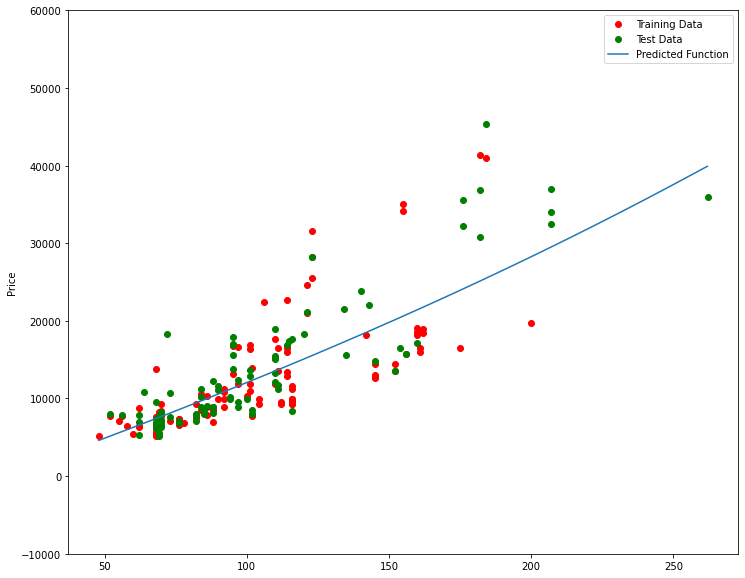

<function __main__.f(order, test_data)>

In [95]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [96]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [97]:
from sklearn.linear_model import Ridge

In [98]:
RigeModel=Ridge(alpha=1)

In [99]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [100]:
yhat = RigeModel.predict(x_test_pr)

In [101]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [102]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 119.89it/s, Test Score=0.564, Train Score=0.859]


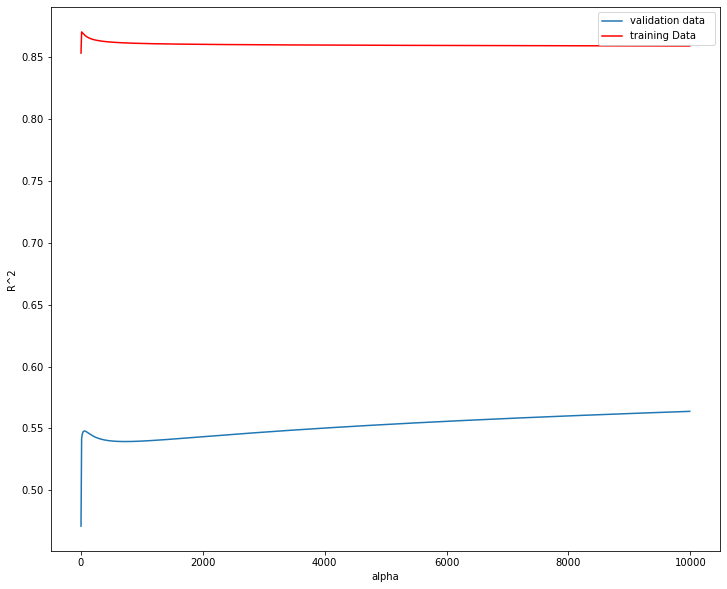

In [103]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [106]:
RR=Ridge()
RR

Ridge()

In [107]:
Grid1 = GridSearchCV(RR, parameters1,cv=4, iid=None)

In [108]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=Ridge(), iid=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [109]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [110]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [111]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_


Ridge(alpha=0.1, normalize=True)